In [113]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import seaborn as sns
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string
import re


In [55]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s7522\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [57]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [58]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [60]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [61]:
df.isna().sum() / len(df)

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [62]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 0)

In [63]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [64]:
df["v1"] = df["v1"].apply(lambda x : 0 if x == "ham" else 1)

In [65]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [114]:
stopwords =stopwords.words("english")
lemmatizer = WordNetLemmatizer()
def process_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords and word not in string.punctuation]
    clean_text = " ".join(words)
    return clean_text

In [115]:
df["v3"] = df["v2"].apply(process_text)

In [116]:
df

,v1,v2,v3
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think go usf life around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u. u å£750 pound priz...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood ... suggestion
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like 'd interested buying s...


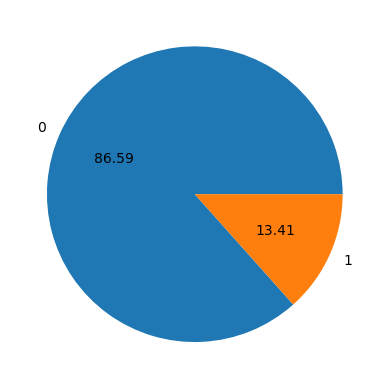

In [117]:
plt.pie(df['v1'].value_counts(), labels=[0,1],autopct="%0.2f")
plt.show()

In [118]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["v3"].values.astype('U'))

In [119]:
X

<5572x8114 sparse matrix of type '<class 'numpy.float64'>'
	with 47919 stored elements in Compressed Sparse Row format>

In [120]:
y = df["v1"]

In [121]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

LGBMClassifier
[LightGBM] [Info] Number of positive: 597, number of negative: 3860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6964
[LightGBM] [Info] Number of data points in the train set: 4457, number of used features: 373
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.133947 -> initscore=-1.866505
[LightGBM] [Info] Start training from score -1.866505
0.9829596412556054


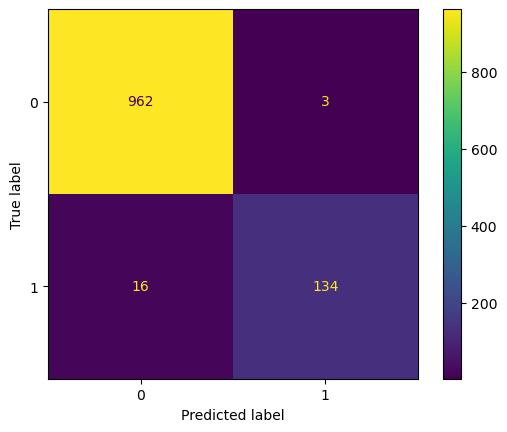

**********
XGBClassifier
0.9811659192825112


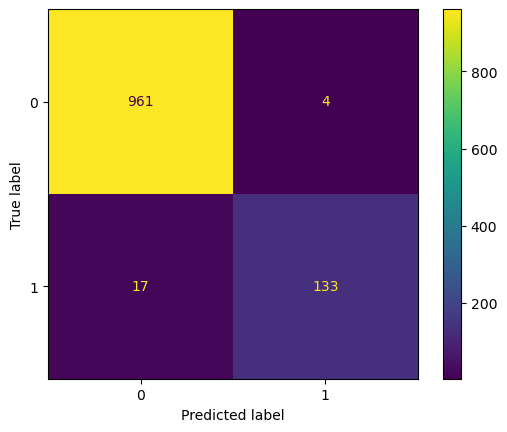

**********
AdaBoostClassifier
0.9748878923766816


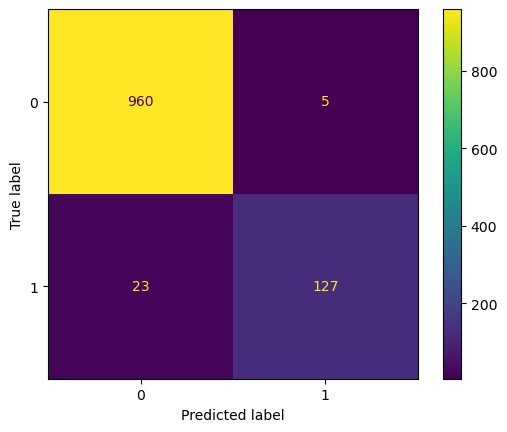

**********
RandomForestClassifier
0.97847533632287


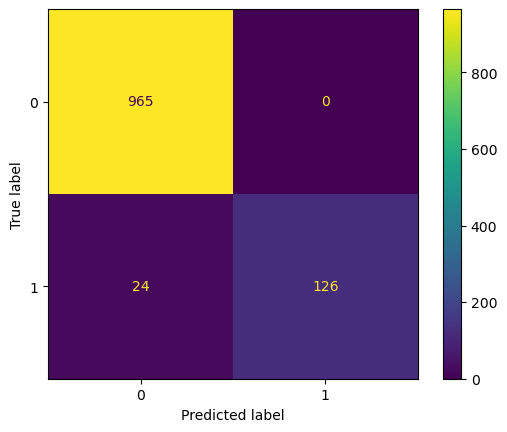

**********
MLPClassifier
0.97847533632287


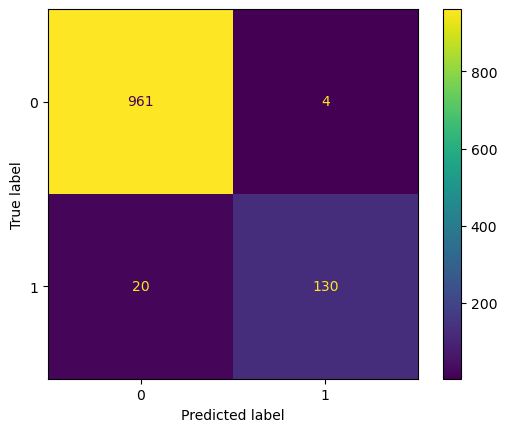

**********
KNNClassifier
0.9085201793721973


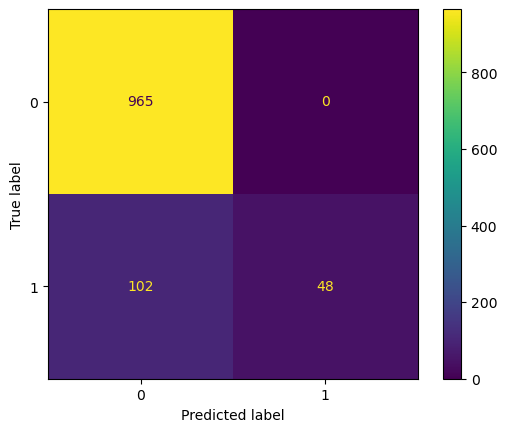

**********


In [124]:
models = {  "LGBMClassifier": LGBMClassifier(), "XGBClassifier": XGBClassifier(),
            "AdaBoostClassifier" : AdaBoostClassifier(), "RandomForestClassifier" : RandomForestClassifier(),
            "MLPClassifier" : MLPClassifier(), "KNNClassifier" : KNeighborsClassifier()
          }
for model_name, model in models.items():
    print(model_name)
    history = model.fit(X_train, y_train)
    yhat = history.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    print(accuracy)
    confusion = confusion_matrix(y_test, yhat)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                              display_labels=history.classes_)
    disp.plot()
    plt.show()
    
    print("**********")